In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Padres players

padres_data = master_data.loc[master_data["Franchise"] == "Padres"]

#Only showing players that signed with the Padres

signed_padres_data = padres_data.loc[padres_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_padres_data.groupby("Year")

#Unsigned Padres draft picks

unsigned_padres_data = padres_data.loc[padres_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1981    51.6
1993    35.8
2006    33.5
2007    33.3
2005    32.3
1988    28.2
1999    28.0
1972    26.0
1973    24.2
1977    18.9
2001    18.2
2011    17.9
1978    17.2
2008    16.9
1982    15.2
1998    15.0
1984    15.0
1991    15.0
2014    14.3
2012    13.9
1987    12.9
1976    12.1
1971    10.3
1990    10.0
1985    10.0
2002     9.2
2010     8.8
1994     7.7
1979     7.0
2004     6.7
2016     6.6
2013     6.1
1970     5.3
2003     4.4
2000     4.3
2009     3.2
1986     2.2
1995     2.1
1968     0.5
1980     0.4
1996     0.4
2018     0.0
2019     0.0
1983    -0.1
2017    -0.1
1997    -0.2
1974    -0.2
1992    -0.4
2015    -0.6
1969    -0.6
1975    -0.7
1989    -1.2
Name: Total_WAR, dtype: float64

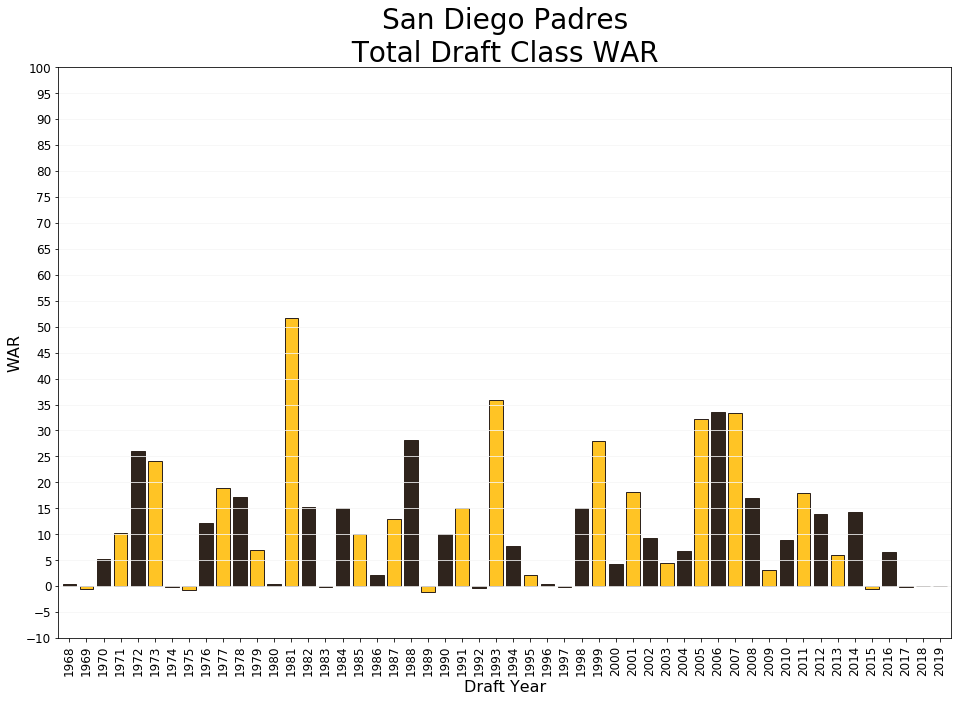

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#2F241D", "#FFC425"], width = .8, fontsize = 12, edgecolor = "#2F241D", figsize = (16, 10.5))
plt.title("San Diego Padres\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Padres WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_padres_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
13242,1981,3,58,Padres,Padres,Y,Tony Gwynn,1982.0,gwynnto01,1005166.0,29.6,0.0,29.6,OF,4Yr,San Diego State University,San Diego,CA,More than 25 WAR
37294,1999,15,472,Padres,Padres,Y,Jake Peavy,2002.0,peavyja01,1051.0,1.9,26.9,28.8,RHP,HS,St. Paul's Episcopal School,Mobile,AL,More than 25 WAR
48830,2007,4,134,Padres,Padres,Y,Corey Kluber,2011.0,klubeco01,2429.0,0.1,28.5,28.6,RHP,4Yr,Stetson University,DeLand,FL,More than 25 WAR
7106,1973,1,4,Padres,Padres,Y,Dave Winfield,1973.0,winfida01,1014127.0,25.6,0.0,25.6,RHP,4Yr,University of Minnesota,Minneapolis,MN,More than 25 WAR
19521,1988,1,1,Padres,Padres,Y,Andy Benes,1989.0,benesan01,1144.0,-0.1,23.2,23.1,RHP,4Yr,University of Evansville,Evansville,IN,20-25 WAR
6408,1972,5,97,Padres,Padres,Y,Randy Jones,1973.0,jonesra01,1006582.0,-1.1,22.2,21.1,LHP,4Yr,Chapman University,Orange,CA,20-25 WAR
13190,1981,1,6,Padres,Padres,Y,Kevin McReynolds,1983.0,mcreyke01,1008690.0,20.7,0.0,20.7,OF,4Yr,University of Arkansas,Fayetteville,AR,20-25 WAR
10014,1977,4,86,Padres,Padres,Y,Ozzie Smith,1978.0,smithoz01,1012186.0,19.7,0.0,19.7,SS,4Yr,California Polytechnic State University San Lu...,San Luis Obispo,CA,15-20 WAR
47527,2006,11,333,Padres,Padres,Y,Mat Latos,2009.0,latosma01,3815.0,-0.1,19.8,19.7,RHP,HS,Coconut Creek HS,Coconut Creek,FL,15-20 WAR
45759,2005,2,66,Padres,Padres,Y,Chase Headley,2007.0,headlch01,4720.0,18.3,0.0,18.3,3B,4Yr,University of Tennessee,Knoxville,TN,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_padres_data.loc[((signed_padres_data["WAR Group"] == "Less than 5 WAR") |
(signed_padres_data["WAR Group"] == "No Major League Experience")) & 
(signed_padres_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
3565,1969,1,24,Padres,Padres,Y,Randy Elliott,1972.0,elliora01,1003743.0,-0.6,0.0,-0.6,1B,HS,Adolfo Camarillo HS,Camarillo,CA,Less than 5 WAR
4584,1970,1,1,Padres,Padres,Y,Mike Ivie,1971.0,iviemi01,1006284.0,2.3,0.0,2.3,C,HS,Walker HS,Atlanta,GA,Less than 5 WAR
5512,1971,1,2,Padres,Padres,Y,Jay Franklin,1971.0,frankja02,1004300.0,0.0,-0.4,-0.4,RHP,HS,James Madison HS,Vienna,VA,Less than 5 WAR
6312,1972,1,1,Padres,Padres,Y,Dave Roberts,1972.0,roberda06,1011032.0,0.6,0.0,0.6,3B,4Yr,University of Oregon,Eugene,OR,Less than 5 WAR
7850,1974,1,1,Padres,Padres,Y,Bill Almon,1974.0,almonbi01,1000174.0,0.0,0.0,0.0,SS,4Yr,Brown University,Providence,RI,Less than 5 WAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61138,2016,1,25,Padres,Padres,Y,Eric Lauer,2018.0,lauerer01,19316.0,-0.2,3.1,2.9,LHP,4Yr,Kent State University,Kent,OH,Less than 5 WAR
62332,2017,1,3,Padres,Padres,Y,MacKenzie Gore,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Whiteville HS,Whiteville,NC,No Major League Experience
63551,2018,1,7,Padres,Padres,Y,Ryan Weathers,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Loretto HS,Loretto,TN,No Major League Experience
63582,2018,1,38,Padres,Padres,Y,Xavier Edwards,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,North Broward Prep HS,Coconut Creek,FL,No Major League Experience


In [9]:
#Best unsigned draft picks in franchise history

unsigned_padres_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
25584,1992,2,55,Padres,Padres,N,Todd Helton,1997.0,heltoto01,432.0,33.2,0.0,33.2,OF,HS,Central HS,Central,TN,More than 25 WAR
28699,1994,2,37,Padres,Padres,N,Troy Glaus,1998.0,glaustr01,15.0,20.7,0.0,20.7,3B,HS,Carlsbad HS,Carlsbad,CA,20-25 WAR
50284,2008,4,135,Padres,Padres,N,Jason Kipnis,2011.0,kipnija01,9776.0,19.7,0.0,19.7,OF,4Yr,Arizona State University,Tempe,AZ,15-20 WAR
26202,1992,24,673,Padres,Padres,N,Geoff Jenkins,1998.0,jenkige01,690.0,16.8,0.0,16.8,3B,HS,Cordova HS,Rancho Cordova,CA,15-20 WAR
3971,1969,18,432,Padres,Padres,N,Doug DeCinces,1973.0,decindo01,1003123.0,16.0,0.0,16.0,3B,JC,Los Angeles Pierce College,Woodland Hills,CA,15-20 WAR
8112,1974,12,265,Padres,Padres,N,Bump Wills,1977.0,willsbu01,1014049.0,14.5,0.0,14.5,2B,4Yr,Arizona State University,Tempe,AZ,10-15 WAR
27531,1993,21,590,Padres,Padres,N,Mark Hendrickson,2002.0,hendrma01,1574.0,0.1,11.0,11.1,LHP,4Yr,Washington State University,Pullman,WA,10-15 WAR
29984,1994,49,1323,Padres,Padres,N,Jason Michaels,2001.0,michaja01,1399.0,8.9,0.0,8.9,OF,HS,Jesuit HS,Tampa,FL,5-10 WAR
11626,1979,6,144,Padres,Padres,N,Harold Reynolds,1983.0,reynoha01,1010870.0,6.6,0.0,6.6,SS,HS,Corvallis HS,Corvallis,OR,5-10 WAR
46031,2005,11,338,Padres,Padres,N,Josh Tomlin,2010.0,tomlijo01,9388.0,0.3,5.5,5.8,RHP,JC,Angelina College,Lufkin,TX,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_padres_data.loc[signed_padres_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
37294,1999,15,472,Padres,Padres,Y,Jake Peavy,2002.0,peavyja01,1051.0,1.9,26.9,28.8,RHP,HS,St. Paul's Episcopal School,Mobile,AL,More than 25 WAR
47527,2006,11,333,Padres,Padres,Y,Mat Latos,2009.0,latosma01,3815.0,-0.1,19.8,19.7,RHP,HS,Coconut Creek HS,Coconut Creek,FL,15-20 WAR
40138,2001,13,390,Padres,Padres,Y,Jason Bartlett,2004.0,bartlja01,8219.0,16.6,0.0,16.6,SS,4Yr,University of Oklahoma,Norman,OK,15-20 WAR
35879,1998,17,502,Padres,Padres,Y,Brian Lawrence,2001.0,lawrebr02,1045.0,-0.2,11.7,11.5,RHP,4Yr,Northwestern State University of Louisiana,Natchitoches,LA,10-15 WAR
27307,1993,13,366,Padres,Padres,Y,Gary Matthews,1999.0,matthga02,153.0,10.3,0.0,10.3,OF,JC,Mission College,Santa Clara,CA,10-15 WAR
5781,1971,12,273,Padres,Padres,Y,Mike Caldwell,1971.0,caldwmi01,1001830.0,-0.4,8.6,8.2,LHP,4Yr,North Carolina State University,Raleigh,NC,5-10 WAR
11151,1978,18,447,Padres,Padres,Y,Eric Show,1981.0,shower01,1011937.0,0.2,7.7,7.9,RHP,4Yr,University of California Riverside,Riverside,CA,5-10 WAR
9652,1976,19,437,Padres,Padres,Y,Gary Lucas,1980.0,lucasga01,1007805.0,-0.5,6.5,6.0,LHP,4Yr,Chapman University,Orange,CA,5-10 WAR
50704,2008,18,555,Padres,Padres,Y,Nick Vincent,2012.0,vinceni01,7555.0,0.0,5.3,5.3,RHP,4Yr,California State University Long Beach,Long Beach,CA,5-10 WAR
45436,2004,42,1241,Padres,Padres,Y,Kyle Blanks,2009.0,blankky01,49.0,3.6,0.0,3.6,1B,HS,Moriarty HS,Moriarty,NM,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(padres_data["Year"], padres_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1968,18.8,68.8,12.5
1969,30.3,60.6,9.1
1970,44.0,56.0,0.0
1971,36.8,63.2,0.0
1972,52.6,47.4,0.0
1973,61.9,38.1,0.0
1974,65.0,35.0,0.0
1975,36.0,60.0,4.0
1976,65.4,34.6,0.0


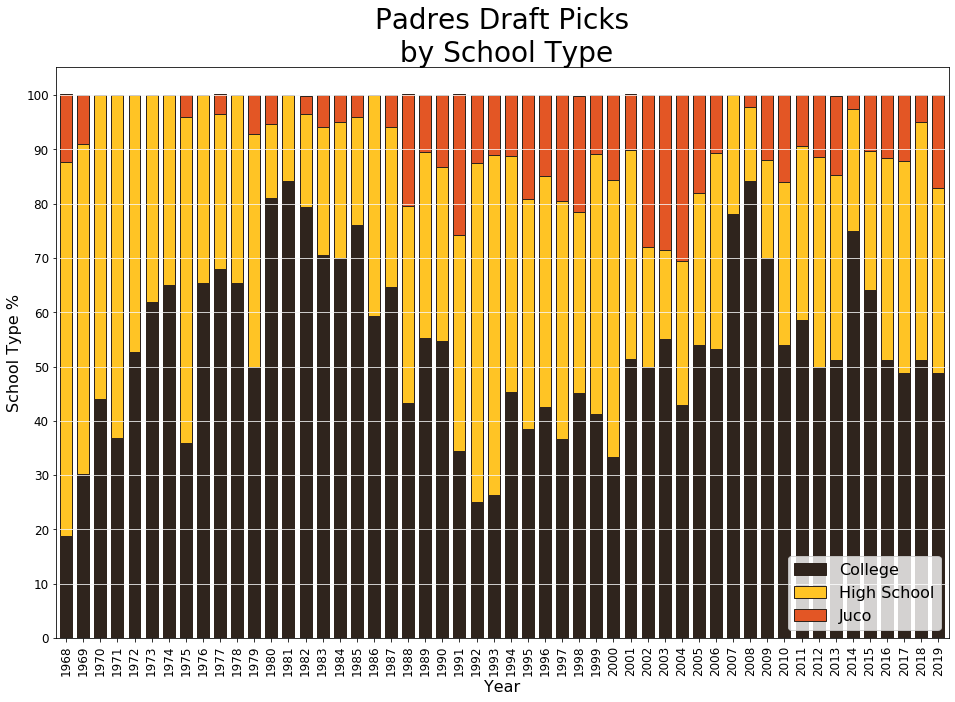

In [15]:
#Bar chart of table above

colors = ["#2F241D", "#FFC425", "#E35625"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#2F241D", stacked = True, figsize = (16, 10.5))
plt.title("Padres Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Padres Draft Picks by School Type.png")
plt.show()